Part1.  
Using cosine similarity and coefficient of variation to measure the degree of change in leadership attributes before and after the course.

In [1]:
import pandas as pd
from scipy import spatial
import numpy as np
df = pd.read_excel("LeadershipAssessment.xlsx")
df

,leader or boss,fair,Assertive,Equalitarian,Introspective,political,Locus of control,task oriented,prople oriented,impatience,...,communication style_Q2_C,communication style_Q2_D,communication style_Q3_A,communication style_Q3_B,communication style_Q3_C,communication style_Q3_D,communication style_Q4_A,communication style_Q4_B,communication style_Q4_C,communication style_Q4_D
0,0.22,0.51,0.76,0.64,0.76,0.10,0.34,0.79,0.4000,0.6327,...,0,0,0,0,1,0,1,0,0,0
1,0.11,0.56,0.80,0.50,0.80,0.15,0.44,0.79,0.3333,0.5300,...,0,1,1,0,0,0,0,1,0,0


In [2]:
from scipy import spatial
vec1 = df.loc[0]
vec2 = df.loc[1]
cos_sim = 1 - spatial.distance.cosine(vec1, vec2)
print(cos_sim)

0.6714703596865311


In [3]:
df2 = df[["leader or boss","fair","Assertive","Equalitarian","Introspective","political","Locus of control " ,"task oriented","prople oriented","impatience",'job involvement',"Hard Driving & Competitive","Type A"]]
df3=df.drop(columns=["leader or boss","fair","Assertive","Equalitarian","Introspective","political","Locus of control " ,"task oriented","prople oriented","impatience",'job involvement',"Hard Driving & Competitive","Type A"])

In [4]:
features=df2.columns.tolist()
cv={}
for i in features:
    data=[df.loc[0,i],df.loc[1,i]]
    coefficient_of_variation = np.std(data) / np.mean(data)
    cv[i]=coefficient_of_variation
sorted_cv = sorted(cv.items(), key=lambda x: x[1], reverse=True)
#print(sorted_cv)
for i in sorted_cv:
    print(i[0],',',i[1])

leader or boss , 0.3333333333333333
political , 0.19999999999999996
Locus of control  , 0.12820512820512817
Equalitarian , 0.12280701754385964
prople oriented , 0.09095867993999732
impatience , 0.08832888965339297
fair , 0.04672897196261686
Assertive , 0.025641025641025664
Introspective , 0.025641025641025664
job involvement , 0.024999999999999953
Type A , 0.012987012987012998
Hard Driving & Competitive , 0.010752688172042961
task oriented , 0.0


In [5]:
df3

,communication style_Q1_A,communication style_Q1_B,communication style_Q1_C,communication style_Q1_D,communication style_Q2_A,communication style_Q2_B,communication style_Q2_C,communication style_Q2_D,communication style_Q3_A,communication style_Q3_B,communication style_Q3_C,communication style_Q3_D,communication style_Q4_A,communication style_Q4_B,communication style_Q4_C,communication style_Q4_D
0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0


In [6]:
from scipy import spatial
vec1 = df3.loc[0]
vec2 = df3.loc[1]
cos_sim = 1 - spatial.distance.cosine(vec1, vec2)
print(cos_sim)

0.25


Part2.  
Visualization of leadership styles

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [8]:
data={"Leader\nInspiration\nGeneral Supervision":89,"Participative\nCommunication Style":75,"Aggressive":80,
      "Authoritarian":50, "Political":15,"Task Oriented":79,"Patience":47,"Job Involvement":82,"Hard Driving & Competitive":94}
angles = np.linspace(0.05, 2 * np.pi - 0.05, len(data), endpoint=False)
value=list(data.values())
style=list(data.keys())
degree=np.array(list(data.values()))/100
GREY12 = "#1f1f1f"
# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})
# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False)
# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]
# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)
# Normalizer
norm = mpl.colors.Normalize(vmin=degree.min(), vmax=degree.max())
# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(degree))

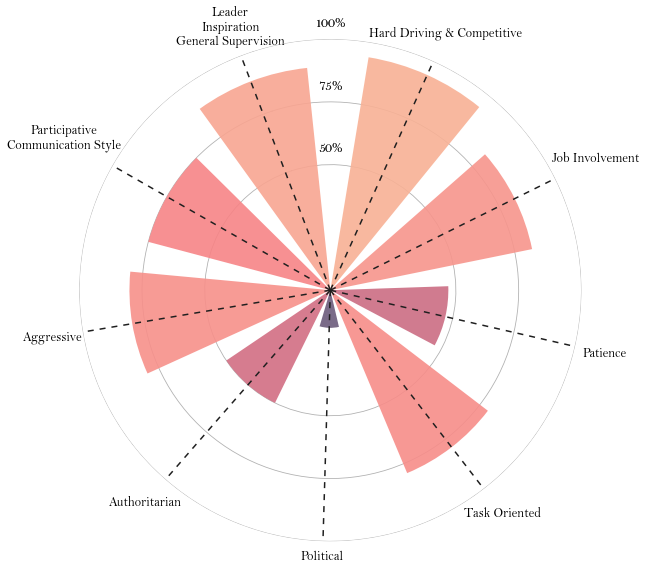

In [9]:
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})
# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(0, 100)
# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top
# Add bars to represent the cumulative track value
ax.bar(angles, value, color=COLORS, alpha=0.9, width=0.52, zorder=10)
# Add dashed vertical lines. These are just references
ax.vlines(angles, 0, 100, color=GREY12, ls=(0, (4, 4)), zorder=11)
# Set the labels
ax.set_xticks(angles)
ax.set_xticklabels(style, size=13);
# Remove unnecesary guides ---------------------------------------
# Remove lines for polar axis (x)
ax.xaxis.grid(False)
# Put grid lines for radial axis (y) 
ax.set_yticklabels([])
ax.set_yticks([0,50,75,100])
#Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")
# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(20)
XTICKS[1].set_pad(45)#extra set for "Participative\nCommunication Style"
XTICKS[4].set_pad(5)#extra set for "Political"
XTICKS[7].set_pad(35)#extra set for "Political"
ax.text(-0.2 * np.pi / 2, 50+5, "50%", ha="center", size=14)
ax.text(-0.2 * np.pi / 2, 75+5, "75%", ha="center", size=14)
ax.text(-0.2 * np.pi / 2, 100+5, "100%", ha="center", size=14)
#double the statements to enhance the thickness
ax.text(-0.2 * np.pi / 2, 50+5, "50%", ha="center", size=14)
ax.text(-0.2 * np.pi / 2, 75+5, "75%", ha="center", size=14)
ax.text(-0.2 * np.pi / 2, 100+5, "100%", ha="center", size=14)
fig.savefig("Leadership.jpg",dpi=300)